In [ ]:
import os
import glob
import pickle
import sys  

sys.path.insert(0, '../py')
from graviti import *

import numpy as np
import pandas as pd

from  matplotlib import pyplot
from matplotlib.colors import ListedColormap
from sklearn import neighbors, datasets
import seaborn

import umap

import warnings
warnings.filterwarnings('ignore')

In [ ]:
df_wo = pd.read_csv('../data/descriptor_woI.umap.csv')
df_wo.rename(columns={"x": "x_wo", "y": "y_wo"},inplace=True)
df_with = pd.read_csv('../data/descriptor_withI.umap.csv')
df_with.rename(columns={"x": "x_with", "y": "y_with"},inplace=True)

In [23]:
print(df_with.shape, df_wo.shape)
df = pd.merge(df_with, df_wo, on="sample")
print(df.shape)
df.head()


(1087, 4) (1087, 4)
(1087, 7)


,Unnamed: 0_x,x_with,y_with,sample,Unnamed: 0_y,x_wo,y_wo
0,0,2.049620,-2.686375,TCGA-BH-A0DI-01Z-00-DX1,0,-2.335626,0.926209
1,1,-8.003499,-0.154389,TCGA-A8-A07C-01Z-00-DX1,1,-4.146150,-2.805570
2,2,-3.578052,-0.905276,TCGA-LL-A6FQ-01Z-00-DX1,2,2.768052,-0.476668
3,3,-0.253871,-0.521378,TCGA-E9-A227-01Z-00-DX1,3,1.499047,-0.593561
4,4,-7.463373,-0.414245,TCGA-A8-A06P-01Z-00-DX1,4,0.841684,1.385156


In [26]:
from scipy.spatial import distance_matrix
M1 = df[['x_with','y_with']].to_numpy()
M2 = df[['x_wo','y_wo']].to_numpy()
D1 = distance_matrix(M1, M1)
D2 = distance_matrix(M2, M2)

print(D1.shape)

(1087, 1087)


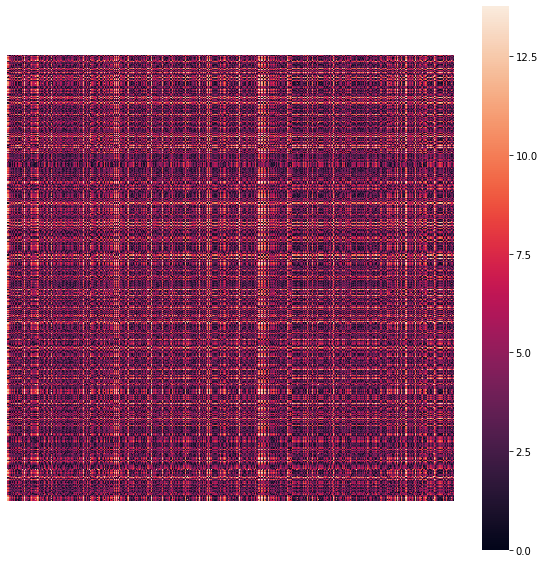

In [39]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(D1,xticklabels=False,yticklabels=False, square=True)

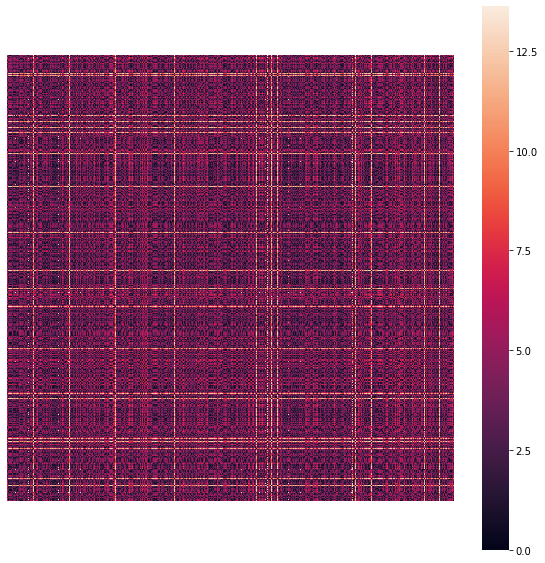

In [37]:
import seaborn as sns
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(D2,xticklabels=False,yticklabels=False,square=True)

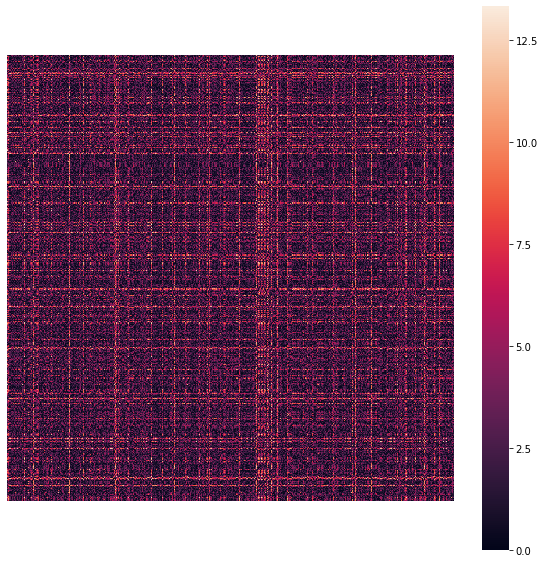

In [38]:
import seaborn as sns
D = np.abs(D1-D2)
f, ax = plt.subplots(figsize=(10, 10))
ax = sns.heatmap(D,xticklabels=False,yticklabels=False,square=True)

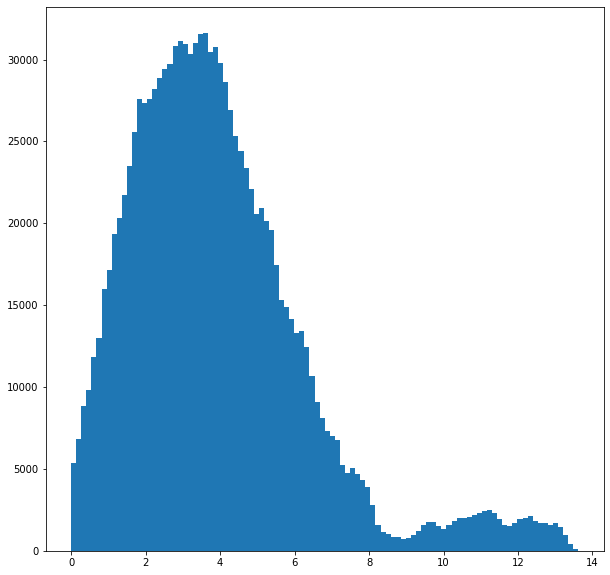

In [49]:
plt.figure(figsize=(10,10))
plt.hist(D2.flatten(),bins= 100)
plt.show()

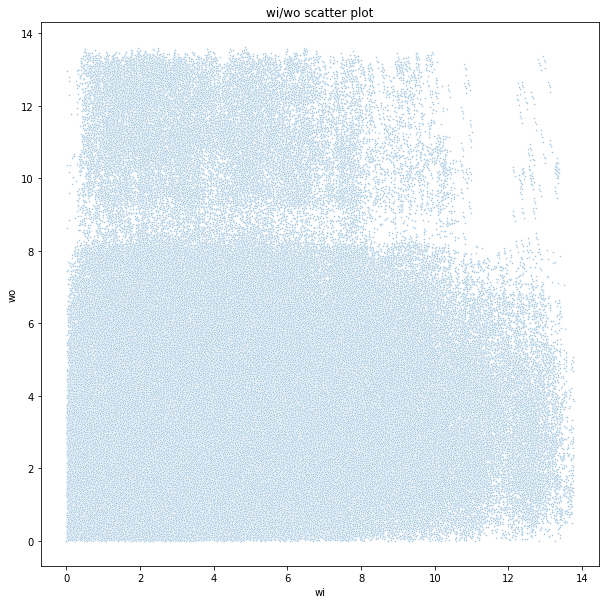

In [67]:
wi = D1.flatten()
wo = D2.flatten()

dist_df = pd.DataFrame({'wi':wi,'wo':wo})

fig, ax = pyplot.subplots(figsize=(10,10))
sns.scatterplot(ax=ax,data=dist_df, x="wi", y="wo",alpha=0.75,s=2)
plt.title('wi/wo scatter plot')
#dist_df.plot(x='wi', y='wo',style='.',figsize=(10,10))
plt.show()

In [ ]:
# K-means classification
from sklearn.cluster import KMeans
X = df_wo[['x_wo','y_wo']]
kmeans = KMeans(n_clusters=2, random_state=0).fit(X)

#Split dataset according to cluster labels
df_wo['cluster'] = kmeans.labels_
df_wo.head()

print(df_with.shape, df_wo.shape)
df = pd.merge(df_with, df_wo, on="sample")
print(df.shape)
df.head()

# Show the cluster to study
import seaborn
seaborn.set(style='white')

fg = seaborn.FacetGrid(data=df[['x_wo','y_wo','cluster']], 
                       hue='cluster',
                      height=10,
                      aspect=1,
                       )
fg.map(pyplot.scatter, 'x_wo', 'y_wo',s=10).add_legend()

# Show the cluster to study
import seaborn
seaborn.set(style='white')

fg = seaborn.FacetGrid(data=df[['x_with','y_with','cluster']], 
                       hue='cluster',
                      height=10,
                      aspect=1)
fg.map(pyplot.scatter, 'x_with', 'y_with',s=10).add_legend()